<a href="https://colab.research.google.com/github/ykitaguchi77/chatGPT/blob/main/code_cooker_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Claude Code Interpreter
Simple data analysis notebook on google colab like Advanced Data Analysis(Code Interpreter).

Reference: [claude_manim.ipynb](https://colab.research.google.com/github/wmoto-ai/claude-manim-notebook/blob/main/claude_manim.ipynb#scrollTo=mF8X8Q3LyZc9)

Install packages

In [1]:
!pip -qqq install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.7 MB/s eta 0:00:00


Import libraries and setup api

In [2]:
import os
from google.colab import userdata
import anthropic
import random
import time
from IPython.core.magic import register_cell_magic


# APIの設定
from google.colab import drive
drive.mount("/content/drive")

with open("/content/drive/MyDrive/Deep_learning/api.txt") as file:
    #text = file.read()
    i=1
    key = []
    while True:
        include_break_line = file.readline() #改行が含まれた行
        line = include_break_line.rstrip() #改行を取り除く
        if line: #keyの読み込み
            #print(f'{i}行目：{line}')
            key.append(line)
            i += 1
        else:
            break

# APIキーの準備
# #ngrok_aceess_token = key[5]
#openai_api_key = key[3]
# deepl_auth_key = key[1]
# serp_api_key = key[7]

os.environ["ANTHROPIC_API_KEY"] = key[21]
client = anthropic.Anthropic(api_key=os.getenv('ANTHROPIC_API_KEY'))

Mounted at /content/drive


Define function

In [5]:
MAX_RETRAY_COUNT = 3

@register_cell_magic
def _(line, cell):
    system_prompt = f"""あなたはJupyterNotebookを使うPythonデータサイエンティストです。
    入力された指示をもとに、データ分析を実施してください。
    回答には、1つのPythonコードブロック（マジックコマンド、クラス定義、コンストラクタを含む）のみを含め```pythonで囲ってください。
    限界を超えてがんばってください。うまくいったらチップあげます。
    """

    user_prompt = cell
    filename = line

    if filename != "":
        system_prompt += f"""
        # 入力データ:ファイルパス
        {filename}
        なお、データはUTF-8で読み込んでください。
        """

    messages = [
        {"role": "user", "content": user_prompt}
    ]

    prompt_w_history.extend(messages)

    retry_count = 0
    while retry_count < MAX_RETRAY_COUNT:
        try:
            response = client.messages.create(
                max_tokens=2048,
                messages=prompt_w_history,
                model="claude-3-opus-20240229",
                system=system_prompt
            )
        except Exception as e:
            print(e)
            time.sleep(3)
            continue

        assistant_response = response.content[0].text

        print("APIからの応答:", assistant_response)

        python = ""
        if "```python" in assistant_response and "```" in assistant_response:
            python = assistant_response.split("```python")[1].split("```")[0]

        print("抽出されたPythonコード:", python)

        try:
            exec(python)
            prompt_w_history.append({"role": "assistant", "content": str(assistant_response)})
            break
        except Exception as e:
            print(f"エラーが発生しました: {e}")
            prompt_w_history.append({"role": "assistant", "content": str(assistant_response)})
            prompt_w_history.append({"role": "user", "content": f"エラーが発生しました。エラーメッセージ: {e}\nコードを修正して再度実行してください。"})
            retry_count += 1

    print("コードの実行が完了しました。" if retry_count < MAX_RETRAY_COUNT else "コードの修正に失敗しました。再実行回数が上限に達しました。")

Initialize prompt

In [19]:
prompt_w_history = []

Execute

In [ ]:
%%_
kaggleのtitanicを分析してください

In [ ]:
%%_ train.csv
kaggleのtitanicを分析してください。対象のデータはtrain.csvです。

In [ ]:
%%_
可視化してください。

In [20]:
%%_
シフト表を作成してください。Excelファイル（シフト表.csv）のメンバーIDシートがIDとメンバーの対応、サンプルがシフト表のサンプルです。
午前が1コマ、午後が1コマです。1日は2コマ、1週間は14コマとなります。うまくいかなかったら途中までで保存してください。
ファイルがなければ新規に作成してください

条件は以下です。

条件："""
1. 連続で勤務できるのは4日までです（4日はOK）
2. Aさんは平日の午前と午後に勤務できる。
3. Bさんは午前に勤務できる。
4. Cさんは月・火・木・金・土・日の午前と午後に勤務できる。
5. Dさんは午後に勤務できる。
"""

入力データのファイルパス:"""
./シフト表.csv
"""

APIからの応答: ```python
import pandas as pd
import random

# Excelファイルからデータを読み込む
try:
    df = pd.read_csv("./シフト表.csv", sheet_name="メンバーID", index_col=0)
    member_ids = df.to_dict()["メンバー"]
except FileNotFoundError:
    print("ファイルが見つかりませんでした。新規に作成します。")
    member_ids = {1: "A", 2: "B", 3: "C", 4: "D"}

# シフト表のサンプルを読み込む
try:
    sample_df = pd.read_csv("./シフト表.csv", sheet_name="サンプル", index_col=0)
except FileNotFoundError:
    print("サンプルシートが見つかりませんでした。新規に作成します。")
    sample_df = pd.DataFrame(index=range(1, 8), columns=["月AM", "月PM", "火AM", "火PM", "水AM", "水PM", "木AM", "木PM", "金AM", "金PM", "土AM", "土PM", "日AM", "日PM"])

# 条件を満たすようにシフトを割り当てる関数
def assign_shift(sample_df, member_ids, max_consecutive_days=4):
    shift_df = sample_df.copy()
    
    for col in shift_df.columns:
        available_members = []
        if col in ["月AM", "月PM", "火AM", "火PM", "木AM", "木PM", "金AM", "金PM"]:
            available_members.extend([k for k, v in member_ids.items() if v in ["A", "C"]])
        if col in

In [14]:
import pandas as pd
import numpy as np

#**マジックコマンドを用いないバージョン**

APIからの応答: 以下のコードを実行すると、放物線がmatplotlibで作画されます。

```python
import numpy as np
import matplotlib.pyplot as plt

# x座標の範囲を設定
x = np.linspace(-5, 5, 100)

# 放物線の式 y = x^2 を計算
y = x**2

# グラフを描画
plt.plot(x, y)

# グラフのタイトルと軸ラベルを設定
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel("y")

# グラフを表示
plt.show()
```

このコードでは以下の処理を行っています：

1. `numpy`と`matplotlib`をインポートします。
2. `np.linspace()`を使って、-5から5までの範囲で100個の等間隔な点のx座標を生成します。
3. 放物線の式 y = x^2 を計算します。
4. `plt.plot()`を使ってグラフを描画します。
5. `plt.title()`、`plt.xlabel()`、`plt.ylabel()`を使ってグラフのタイトルと軸ラベルを設定します。
6. `plt.show()`でグラフを表示します。

実行すると、放物線のグラフが表示されます。必要に応じて、x座標の範囲や放物線の式を変更することで、様々な放物線を描画できます。
抽出されたPythonコード: 
import numpy as np
import matplotlib.pyplot as plt

# x座標の範囲を設定
x = np.linspace(-5, 5, 100)

# 放物線の式 y = x^2 を計算
y = x**2

# グラフを描画
plt.plot(x, y)

# グラフのタイトルと軸ラベルを設定
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel("y")

# グラフを表示
plt.show()



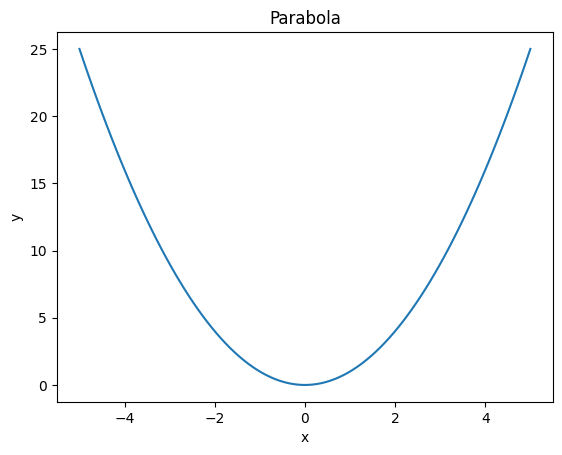

コードの実行が完了しました。


In [23]:
import os

MAX_RETRAY_COUNT = 3

def analyze_data(filename, user_prompt):
    system_prompt = f"""あなたはJupyterNotebookを使うPythonデータサイエンティストです。
    入力された指示をもとに、データ分析を実施してください。
    回答には、1つのPythonコードブロック（マジックコマンド、クラス定義、コンストラクタを含む）のみを含め```pythonで囲ってください。
    限界を超えてがんばってください。うまくいったらチップあげます。
    """

    if filename != "":
        system_prompt += f"""
        # 入力データ:ファイルパス {filename}
        なお、データはUTF-8で読み込んでください。
        """

    messages = [
        {"role": "user", "content": user_prompt}
    ]
    prompt_w_history.extend(messages)

    retry_count = 0
    while retry_count < MAX_RETRAY_COUNT:
        try:
            response = client.messages.create(
                max_tokens=2048,
                messages=prompt_w_history,
                model="claude-3-opus-20240229",
                system=system_prompt
            )
        except Exception as e:
            print(e)
            time.sleep(3)
            continue

        assistant_response = response.content[0].text
        print("APIからの応答:", assistant_response)

        python = ""
        if "```python" in assistant_response and "```" in assistant_response:
            python = assistant_response.split("```python")[1].split("```")[0]
        print("抽出されたPythonコード:", python)

        try:
            exec(python)
            prompt_w_history.append({"role": "assistant", "content": str(assistant_response)})
            break
        except Exception as e:
            print(f"エラーが発生しました: {e}")
            prompt_w_history.append({"role": "assistant", "content": str(assistant_response)})
            prompt_w_history.append({"role": "user", "content": f"エラーが発生しました。エラーメッセージ: {e}\nコードを修正して再度実行してください。"})
            retry_count += 1

    print("コードの実行が完了しました。" if retry_count < MAX_RETRAY_COUNT else "コードの修正に失敗しました。再実行回数が上限に達しました。")

# 使用例
filename = ""
user_prompt = "放物線をmatplotlibで作画してください"
analyze_data(filename, user_prompt)